# The one-way nonparametric ANOVA

In the last post we did the ANOVA analysis of the variance comparison in groups. It turned out, unexpectedly, that one of the conditions of the correct ANOVA ols model was not met.
The ANOVA model has three basic conditions:
1. residual values have a normal distribution (Wilks Shapiro test)
2. variances in groups are homogeneous (Levene or Bartlett test)
3. observations are carried out independently of each other.

ANOVA ols did not pass the first Wilks Shapiro test for normal distribution of residual values and Levene test.
Therefore, ANOVA cannot be used.
Now I will repeat the whole procedure from the previous entry. I will then perform an analysis of variance using a nonparametric test to replace ANOVA.

# Analysis of air pollution by PT08.S1 (CO) using ANOVA
- H0: Air pollution PT08.S1 (CO) does NOT differ significantly over four daily periods
- H1: Air pollution PT08.S1 (CO) significantly differs over four daily periods


We analyze only one factor because we are interested in the quality of treatment (this is one factor) so we choose one-factor model of ANOVA.

data source:

In [1]:
import pandas as pd
df2 = pd.read_csv('c:/TF/AirQ_filled.csv')
df2.head(3)

,Unnamed: 0,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0,10/03/2004,18.00.00,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,1,10/03/2004,19.00.00,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2,10/03/2004,20.00.00,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502


In [2]:
df2.dtypes

Unnamed: 0         int64
Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

We process the Time column into a number format.

In [3]:
df2['Time'] = df2.Time.str.slice(0,2)

In [4]:
df2['Time']= df2['Time'].convert_objects(convert_numeric=True) 
df2['Time'].dtype

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


dtype('int64')

We check the completeness of the data.

In [5]:
df2.isnull().sum()

Unnamed: 0       0
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

I separate four daily periods.

In [6]:
df2['Periods'] = pd.qcut(df2.Time,4,labels=["0-5","6-12","12-18","18-24"])

In [7]:
df2.dtypes

Unnamed: 0          int64
Date               object
Time                int64
CO(GT)            float64
PT08.S1(CO)       float64
C6H6(GT)          float64
PT08.S2(NMHC)     float64
NOx(GT)           float64
PT08.S3(NOx)      float64
NO2(GT)           float64
PT08.S4(NO2)      float64
PT08.S5(O3)       float64
T                 float64
RH                float64
AH                float64
Periods          category
dtype: object

I check daily times.

In [8]:
pd.pivot_table(df2, index='Periods', values='Time', aggfunc=['min', 'max'])

,min,max
,Time,Time
Periods,,
0-5,0,5
6-12,6,11
12-18,12,18
18-24,19,23


Now we create a pivot table, where the columns will have four daily periods.

In [9]:
PKS = pd.pivot_table(df2, index = 'Date', columns = 'Periods', values='PT08.S1(CO)')
PKS.head(4)

Periods,0-5,6-12,12-18,18-24
Date,,,,
01/01/2005,1119.166667,968.833333,1186.142857,1182.2
01/02/2005,1018.833333,1372.000000,1413.857143,1152.4
01/03/2005,737.666667,827.833333,826.285714,901.4
01/04/2004,1013.666667,1375.000000,1209.428571,1341.8


### We accept research hypotheses for pollutants with the substance PT08.S1 (CO)

- H0: Air pollution PT08.S1 (CO) does NOT differ significantly over four daily periods
- H1: Air pollution PT08.S1 (CO) significantly differs over four daily periods

### <span style = "color: red"> Test ANOVA </span>

I change the name PT08.S1(CO) to PT08S1CO.

In [10]:
df2.rename(columns={'PT08.S1(CO)':'PT08S1CO'},inplace=True)

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model3 = ols('PT08S1CO ~ C(Periods)', data=df2).fit()

anova_table = sm.stats.anova_lm(model3, typ=2)
print(anova_table)

                  sum_sq      df           F  PR(>F)
C(Periods)  6.715672e+07     3.0  545.269232     0.0
Residual    3.839796e+08  9353.0         NaN     NaN


Interpretation: The P value obtained from ANOVA is significant (P <0.05), so we conclude that there are statistically significant differences in air pollution PT08.S1 (CO) over four daily periods.

### Checking compliance with ANOVA
Conditions:
1. residual values have a normal distribution (Wilks Shapiro test)
2. variances in groups are homogeneous (Levene or Bartlett test)
3. observations are carried out independently of each other

### <span style = "color: red"> Levene's test </span> Checking variance homogeneity

#### Null hypothesis: a group from the population have equal variances.

Now we create a pivot table, where there will be 4 daily periods in columns.

In [12]:
PKS = pd.pivot_table(df2, index = 'Date', columns = 'Periods', values='PT08S1CO')
PKS.head(4)

Periods,0-5,6-12,12-18,18-24
Date,,,,
01/01/2005,1119.166667,968.833333,1186.142857,1182.2
01/02/2005,1018.833333,1372.000000,1413.857143,1152.4
01/03/2005,737.666667,827.833333,826.285714,901.4
01/04/2004,1013.666667,1375.000000,1209.428571,1341.8


In [13]:
P01=PKS['0-5'].dropna(how='any')
P02=PKS['6-12'].dropna(how='any')
P03=PKS['12-18'].dropna(how='any')
P04=PKS['18-24'].dropna(how='any')

In [14]:
import scipy.stats as stats
w,p = stats.levene(P01,P02,P03,P04)
print("Value:   ",w)
print("p-value: ",p)

Value:    30.276341071035155
p-value:  5.0608857455897e-19


Because the P value is significant (p< 0.05), we reject the null hypothesis - i.e. age groups have not uniform variances!

### <span style = "color: red"> Shapiro-Wilk test </span> Checking the normality of residue distribution

##### Null hypothesis: residual values are normally distributed.

In [15]:
import numpy as np
import scipy.stats as stats

w, p = stats.shapiro(model3.resid)
print("Value:   ",w)
print("p-value: ",np.round(p, decimals=2))

Value:    0.967054009437561
p-value:  0.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Because the P value of ZERO is significant because it is smaller than the confidence factor 0.05 (p> 0.05), we reject the null hypothesis - the residual values do not have a normal distribution.

We'll take a closer look at the rest of the model. Let's see how it looks in the chart.

In [16]:
x=model3.resid
title = "Residuals"
x_label = "level"
y_label = "probability"

In [17]:
def Dist1(x, ax, title, x_label, y_label):
    x.plot.kde(ax=ax, legend=False)
    ax.set_title(title, color='darkred', alpha=1)
    ax.set_ylabel(y_label, color='grey', alpha=0.6)
    ax.set_xlabel(x_label, color='grey', alpha=0.6)

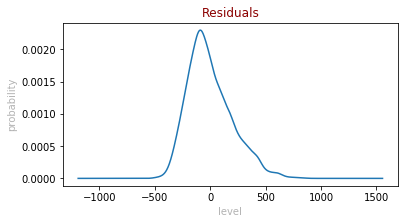

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3))
Dist1(x, ax, title, x_label, y_label)

In [19]:
import scipy
scipy.stats.anderson(model3.resid, dist='norm')

AndersonResult(statistic=85.34820578111066, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

This time check the normal distribution of residues using the QQ chart.
### Q-Q plot

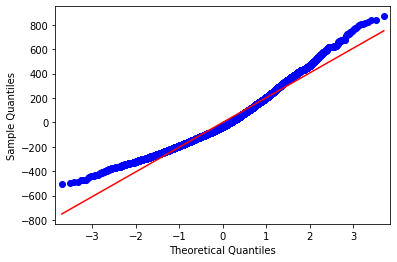

In [20]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

qqplot(model3.resid, line='s')
pyplot.show()

### The Shapiro-Wilk test again
made from scipy library.

In [21]:
from scipy.stats import shapiro

stat, p = shapiro(model3.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.967, p=0.000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### K ^ 2 D'Agostino tests
The K ^ 2 D'Agostino test (Ralpha D'Agostino) calculates summary statistics from the data, namely kurtosis and skewness, to determine whether the distribution of the data deviates from the normal distribution. This is a simple and commonly used statistical test of normality.

  - Skew (skew) is a quantification of how far the distribution is shifted left or right, a measure of asymmetry in the distribution.
  - Kurtosis quantifies the distribution of the tail.



In [22]:
from scipy.stats import normaltest

stat, p = normaltest(model3.resid)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=727.597, p=0.000


The Shapiro-Wilk test and D'Agostino's K ^ 2 test indicated a disturbance in the normality of the probability distribution of residual values.

### If ANOVA does not meet the condition for the normal distribution of residual values, a nonparametric test should be performed.

### <span style = "color: darkgreen"> The Kruskal-Wallis H-test
The Kruskal-Wallis H test (called nonparametric ANOVA) tests the null hypothesis that the median population of all groups is equal. This is a non-parametric version of ANOVA. The test works on 2 or more independent samples that can be of different sizes. The test does not assume distribution normality. Sometimes it is considered as a nonparametric alternative to one-way analysis of variance between groups. Note that rejecting the null hypothesis does not indicate which group is different. Post hoc comparisons between groups are required to determine which groups are different. The method accepts array structures, but not DataFrames.
    
#### The null hypothesis - the equality of distribution functions in compared populations.

In [23]:
PKS.head(3)

Periods,0-5,6-12,12-18,18-24
Date,,,,
01/01/2005,1119.166667,968.833333,1186.142857,1182.2
01/02/2005,1018.833333,1372.000000,1413.857143,1152.4
01/03/2005,737.666667,827.833333,826.285714,901.4


We delete empty values from the data, otherwise the test will not work.

In [24]:
PKS = PKS.dropna(how='any')
PKS.isnull().sum()

Periods
0-5      0
6-12     0
12-18    0
18-24    0
dtype: int64

In [25]:
import scipy.stats as ss

H, p = ss.kruskal(PKS['0-5'], PKS['6-12'], PKS['12-18'], PKS['18-24'])
print('p-value: ',p)

p-value:  6.9004301985820776e-77


6,9^-77 = 0.00000

Interpretation: p-value is significant (p <0.05) which means the need to reject the null hypothesis that the median population of all groups is equal.
#### The median is not equal!

https://scikit-posthocs.readthedocs.io/en/latest/tutorial/

To find out what time periods (data groups) differ in terms of the median, we need to perform post hoc tests. Conover test

### <span style = "color: darkgreen"> Conover’s test
    
In statistics, the Conover quadratic rank test is a nonparametric version of the parametric Levene test for equality of variances. The Conover rank squares test is the only test of equality of variances that seems not to be parametric.

In [26]:
import scikit_posthocs as sp
FF = PKS.columns
x = [PKS['0-5'], PKS['6-12'], PKS['12-18'], PKS['18-24']]
CT = sp.posthoc_conover(x, p_adjust = 'holm')
CT

,1,2,3,4
1,-1.000000e+00,2.135208e-58,3.193252e-56,2.384163e-70
2,2.135208e-58,-1.000000e+00,7.132277e-01,1.247363e-01
3,3.193252e-56,7.132277e-01,-1.000000e+00,7.715147e-02
4,2.384163e-70,1.247363e-01,7.715147e-02,-1.000000e+00


In [27]:
sp.sign_table(CT)

,1,2,3,4
1,-,***,***,***
2,***,-,NS,NS
3,***,NS,-,NS
4,***,NS,NS,-


P-values are replaced with asterisks: * - p < 0.05, ** - p < 0.01, *** - p < 0.001..

(<matplotlib.axes._subplots.AxesSubplot at 0x153984ad470>,
 <matplotlib.colorbar.ColorbarBase at 0x1539847bfd0>)

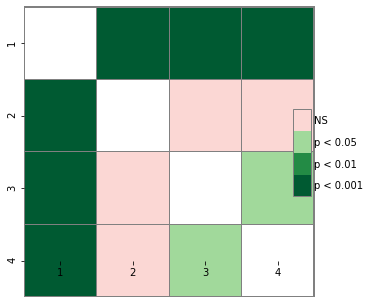

In [28]:
pc = sp.posthoc_conover(x, val_col='values', group_col='groups')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

From what could be determined only at night not from 0 to 5 am no contamination with PT08.S1 (CO) is different (smaller). This can also be seen on the graph.

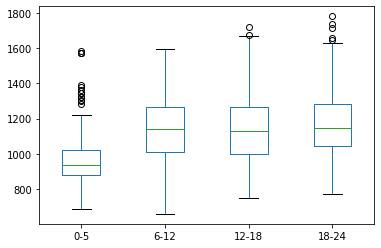

In [29]:
import matplotlib.pyplot as plt
PKS.boxplot(column=['0-5', '6-12', '12-18', '18-24'], grid=False)